<a href="https://colab.research.google.com/github/sradhasatheeshp/Water-Potability/blob/main/water_potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Water Potability Prediction using ML Models

Importing Libraries and checking CSV


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [76]:
df= pd.read_csv("/content/drinking_water_potability.csv")
df.shape

(3276, 10)

In [77]:
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [79]:
df.nunique

<bound method DataFrame.nunique of             ph    Hardness       Solids  Chloramines     Sulfate  \
0          NaN  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246         NaN   
2     8.099124  224.236259  19909.54173     9.275884         NaN   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362         NaN   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436525       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459761       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]>

DATA ANALYSIS

Potability
0    1998
1    1278
Name: count, dtype: int64

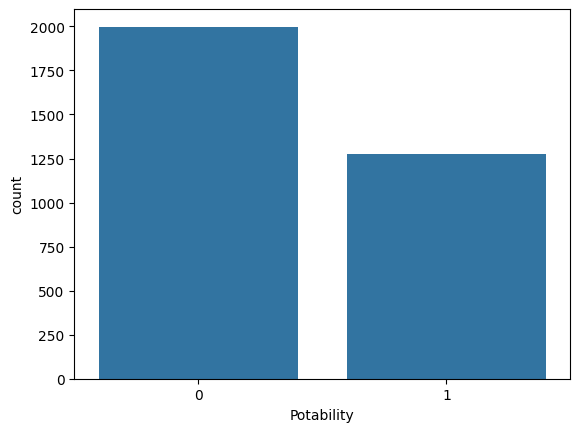

In [80]:
sns.countplot(data=df,x=df.Potability)
df.Potability.value_counts()

In [81]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Hangling null

In [82]:
null= ['ph','Sulfate','Trihalomethanes']

/tmp/ipython-input-1104780343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.ph)


<Axes: xlabel='ph', ylabel='Density'>

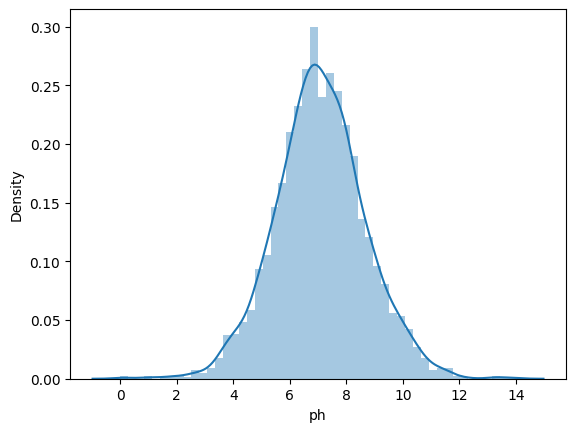

In [83]:
sns.distplot(df.ph)

In [84]:
df['ph'] = df['ph'].replace(np.nan, df.ph.mean())

/tmp/ipython-input-2561706797.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Sulfate)


<Axes: xlabel='Sulfate', ylabel='Density'>

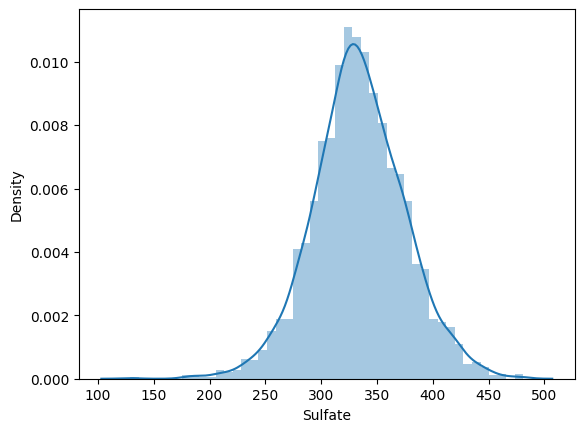

In [85]:
sns.distplot(df.Sulfate)

In [86]:
df['Sulfate'] = df['Sulfate'].replace(np.nan,df.Sulfate.mean())

/tmp/ipython-input-2688979263.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Trihalomethanes)


<Axes: xlabel='Trihalomethanes', ylabel='Density'>

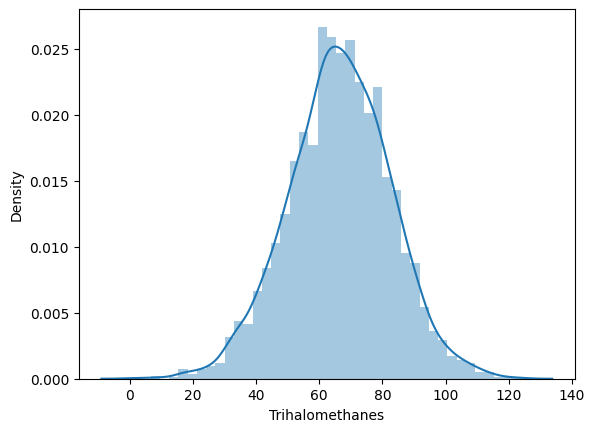

In [87]:
sns.distplot(df.Trihalomethanes)

In [88]:
df['Trihalomethanes'] = df['Trihalomethanes'].replace(np.nan,df.Trihalomethanes.mean())

In [89]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

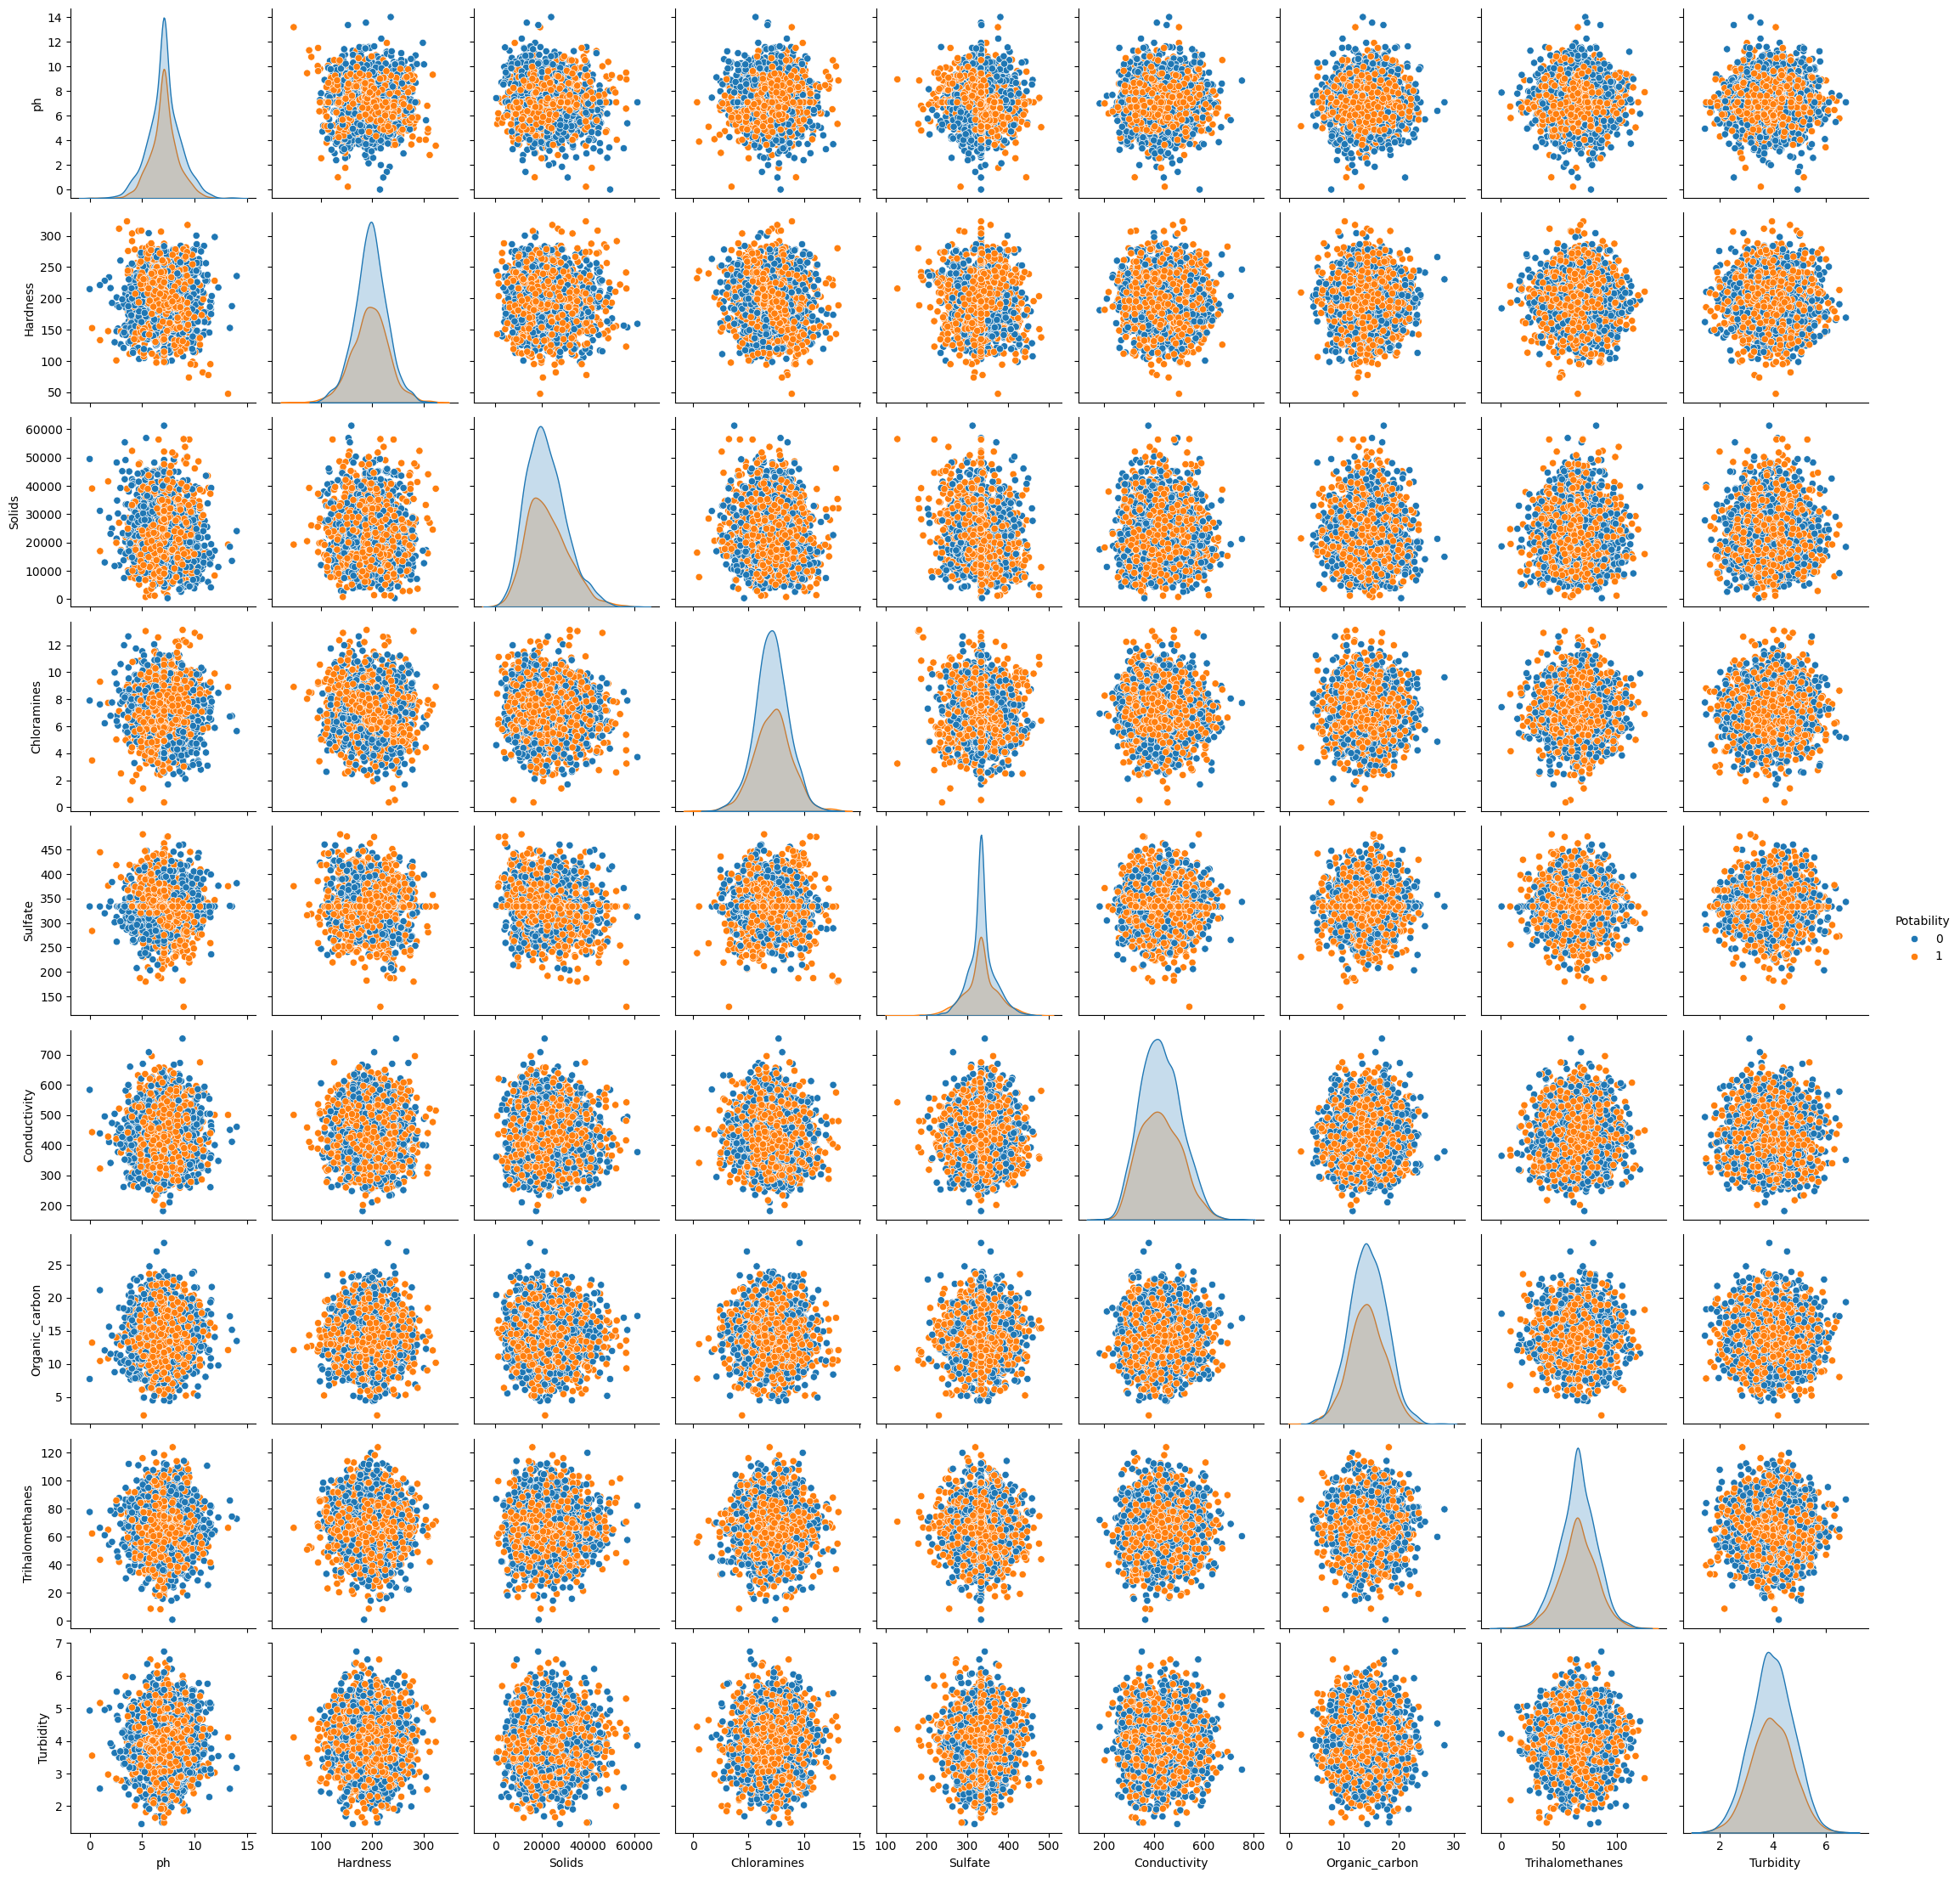

In [90]:
sns.pairplot(data=df,hue='Potability')

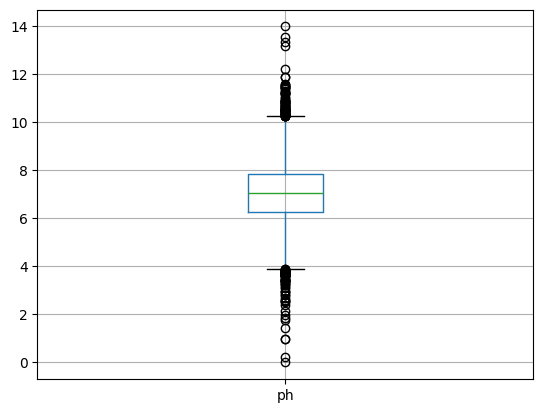

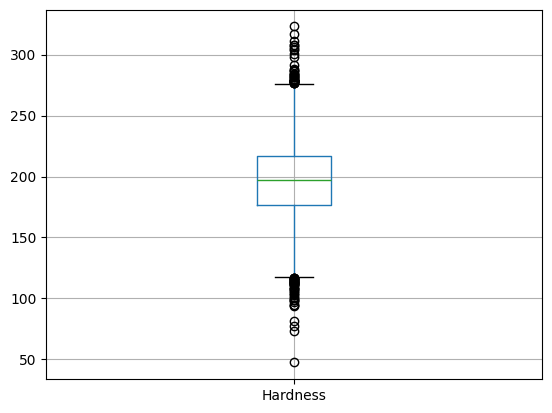

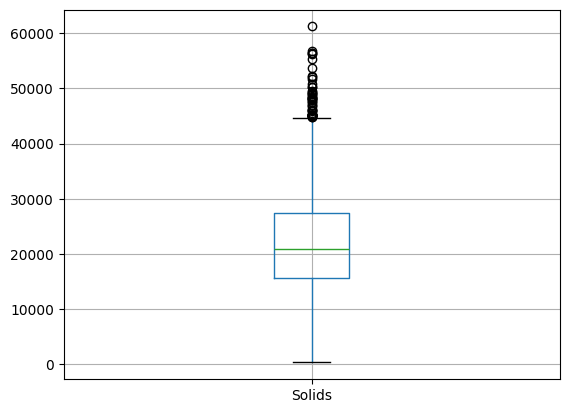

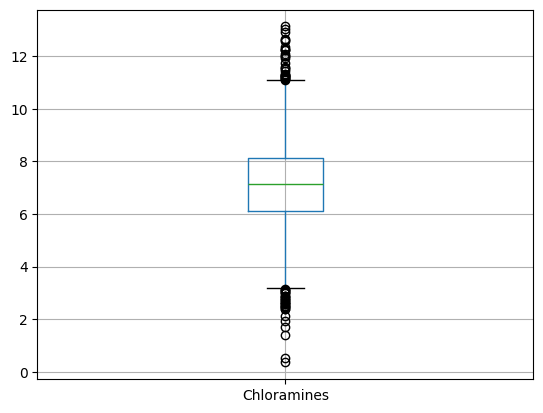

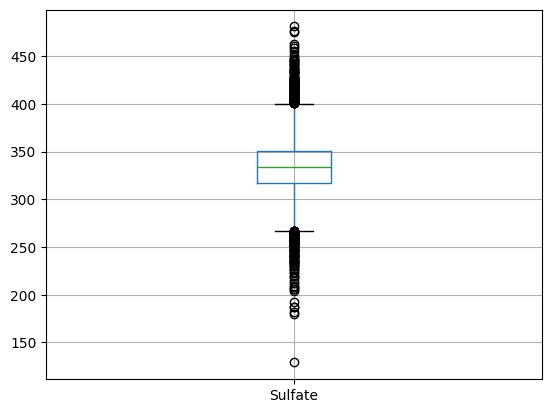

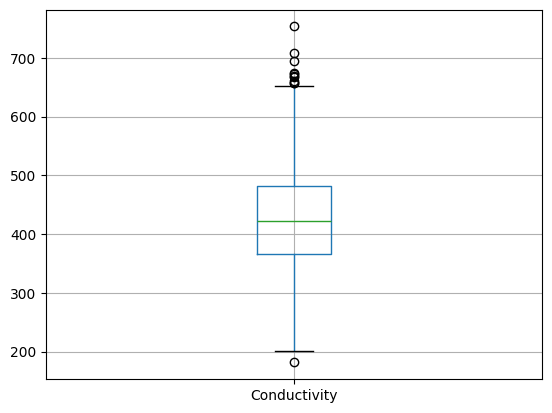

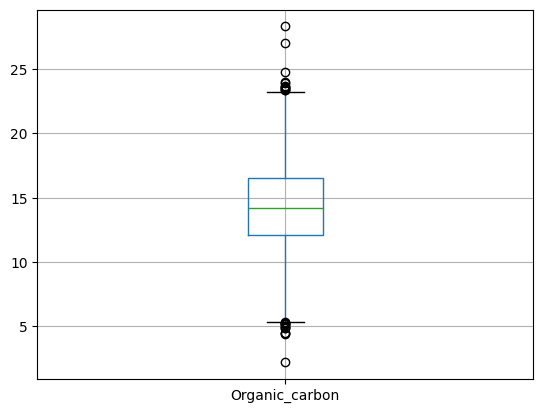

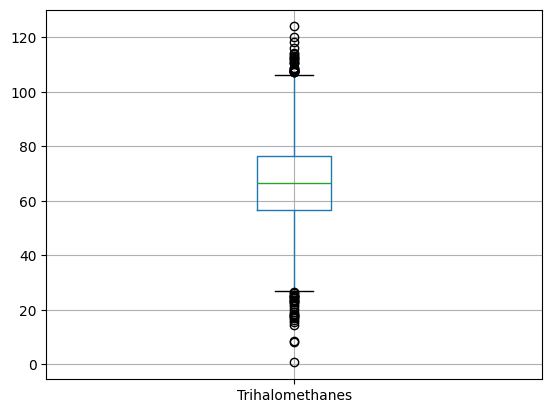

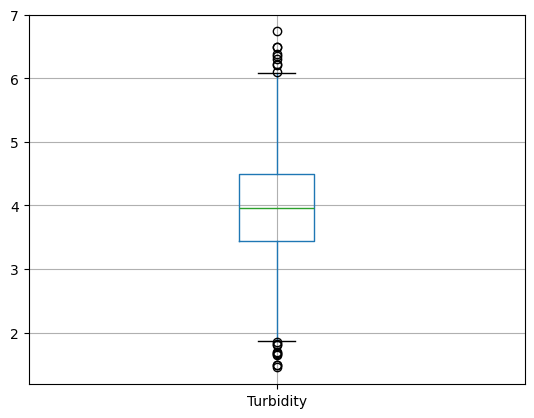

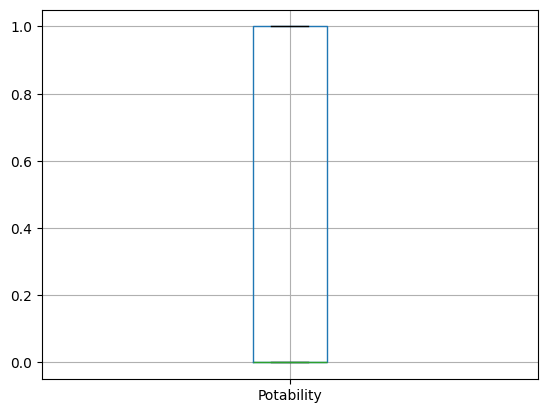

In [91]:
for column in df.columns:
    plt.figure()
    df.boxplot([column])

In [92]:
df.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014403   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014403 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009790   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness            -0.023915        0.003610        -0.012690  -0.014449   
Solids               0.013831        0.010242        -0.008875   0.019546   
Chloramines         -0.020486       -0.012653         0.016627   0.002363   
Sulfate             -0.014059        0.026909        -0.025605  -0.009790   
Conductivity         1.000000        0.020966         0.001255   0.005798   
Organic_carbon       0.020966        1.000000        -0.012976  -0.027308   
Trihalomethanes      0.001255       -0.012976         1.000000  -0.021502   
Turbidity            0.005798       -0.027308        -0.021502   1.000000   
Potability          -0.008128       -0.030001         0.006960   0.001581   

                 Potability  
ph                -0.003287  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.020619  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.006960  
Turbidity          0.001581  
Potability         1.000000

<Axes: >

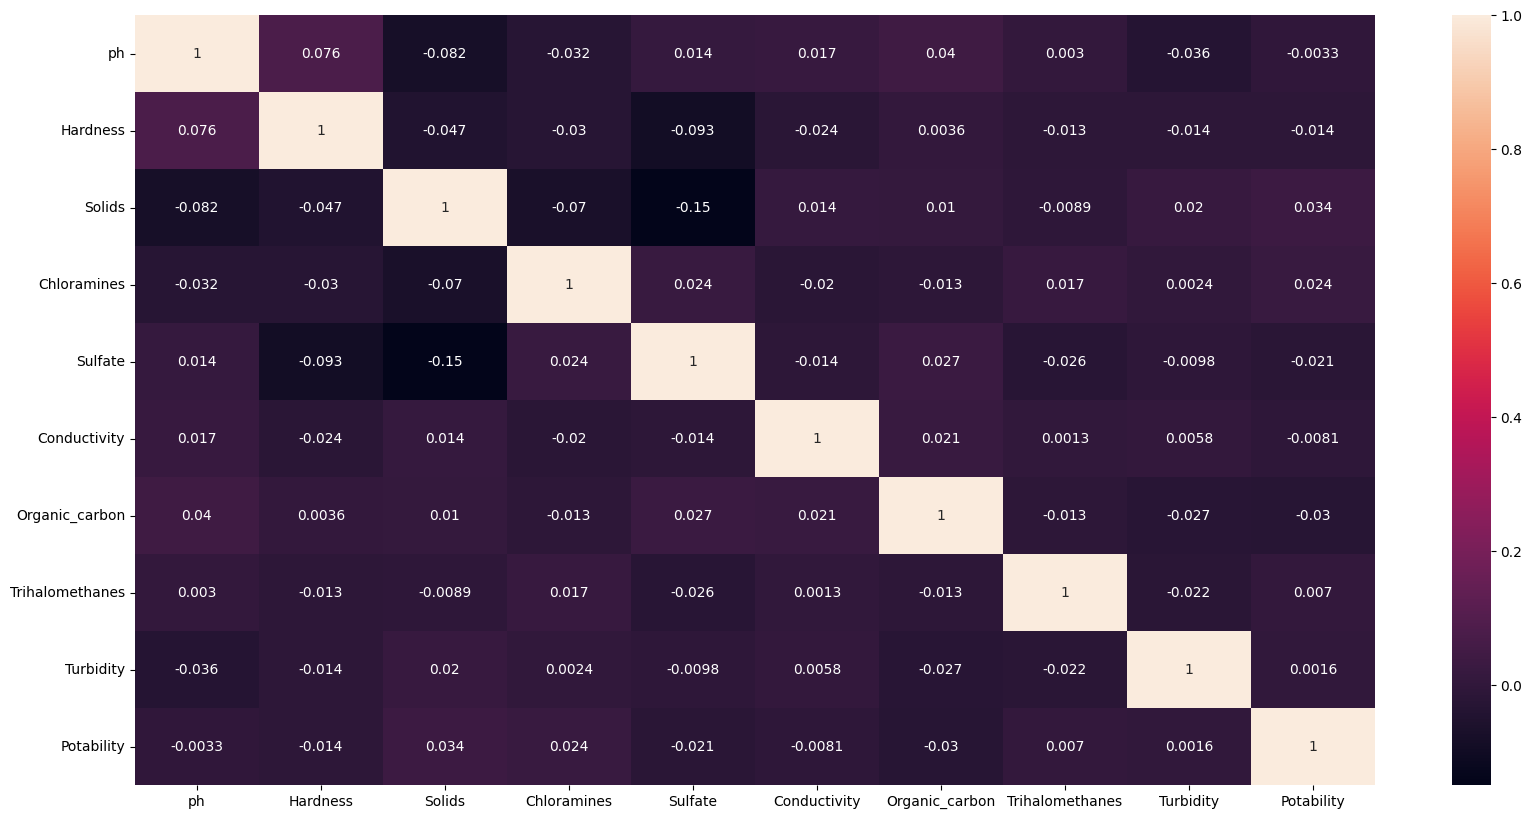

In [93]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

Feature Engineering

In [94]:
from sklearn.ensemble import ExtraTreesClassifier
x = df.drop(['Potability'],axis=1)
y =df.Potability

In [95]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

In [96]:
Ext = ExtraTreesClassifier()
Ext.fit(x,y)

ExtraTreesClassifier()

In [97]:
print(Ext.feature_importances_)

[0.12539669 0.11754523 0.11191309 0.11289715 0.12678901 0.10241472
 0.10265723 0.10070331 0.09968357]


<Axes: >

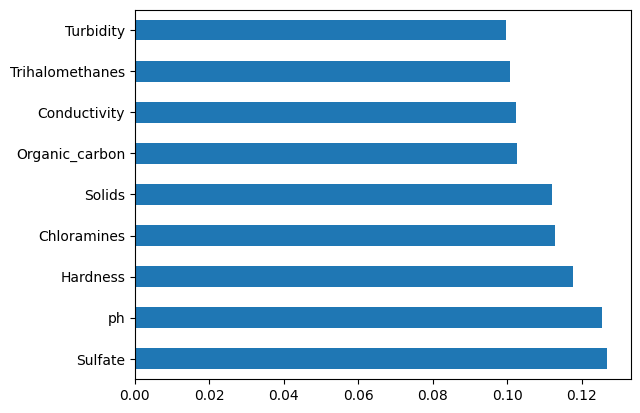

In [98]:
feature = pd.Series(Ext.feature_importances_,index=x.columns)
feature.sort_values(ascending=True).nlargest(10).plot(kind='barh')

In [99]:
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.54173     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

Standardizing data

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scale= StandardScaler()

In [102]:
scaled= scale.fit_transform(x)

In [103]:
scaled

array([[ 0.00000000e+00,  2.59194712e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986649e-01, ...,
         2.70597241e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116858e-01,  1.50940874e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329233e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797384e-01],
       [ 5.40150905e-01, -3.85462306e-02, -5.25811938e-01, ...,
         5.60940071e-01,  7.80223466e-01, -2.12445866e+00]])

In [104]:
scaled_df = pd.DataFrame(scaled,columns= x.columns)
scaled_df.head()

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.000000  0.259195 -0.139471     0.112415  0.961357      1.708954   
1 -2.289339 -2.036414 -0.385987    -0.307694  0.000000      2.062575   
2  0.692868  0.847665 -0.240047     1.360594  0.000000     -0.094032   
3  0.840950  0.547651  0.000493     0.592008  0.639519     -0.778830   
4  1.368569 -0.464429 -0.460249    -0.363698 -0.654177     -0.343939   

   Organic_carbon  Trihalomethanes  Turbidity  
0       -1.180651         1.306149  -1.286298  
1        0.270597        -0.638480   0.684218  
2        0.781117         0.001509  -1.167365  
3        1.255134         2.152874   0.848412  
4       -0.824357        -2.181599   0.138786

In [105]:
X_train,X_test,y_train,y_test = train_test_split(scaled_df,y,test_size=0.2,random_state=0)

In [106]:
X_train.shape

(2620, 9)

In [107]:
X_test.shape

(656, 9)

In [108]:
X_train

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
2128 -1.065532  0.984538  1.520381    -1.753597  0.000000      1.236297   
1519  0.000000  0.436912 -0.951575     0.899590  2.343707     -0.915124   
40    0.000000  1.140374 -1.175989    -1.593897 -0.684517     -0.950425   
1151 -1.889610  0.931949 -1.675647     0.232639 -0.195937     -0.164688   
2404  1.730882  0.638888  0.360623     1.744752 -0.127330     -0.397842   
...        ...       ...       ...          ...       ...           ...   
835   0.244963 -0.395647 -0.542274    -1.587038  0.051212      0.331514   
3264 -0.808101  1.304953 -0.169657    -0.488182  0.207006     -0.279508   
1653 -0.294468 -0.137726 -0.779927    -0.922779  0.000000      0.554895   
2607  0.404917  1.123393  0.189228     0.811969  0.000000     -2.395587   
2732  0.000000 -1.078447 -0.920570     0.807062  1.300401     -1.015334   

      Organic_carbon  Trihalomethanes  Turbidity  
2128        0.195308        -1.244066  -1.497735  
1519       -1.188549        -1.337709  -0.771400  
40          1.225617        -1.504288  -0.585420  
1151       -0.416682         0.149207  -2.507165  
2404        1.811736         1.233169  -1.732144  
...              ...              ...        ...  
835        -1.385895         0.896832  -1.884548  
3264        1.414517        -0.161724   0.543298  
1653        0.348681        -0.625586  -0.175585  
2607        1.262053        -0.342649   1.376041  
2732        0.279267         0.582133   0.223984  

[2620 rows x 9 columns]

MODEL DEV

Model used :  RF

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [110]:
rf = RandomForestClassifier(n_jobs=-1,random_state=123)
rf.fit(X_train, y_train)
y_train_hat = rf.predict(X_train)
y_test_hat = rf.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       412
           1       0.68      0.34      0.45       244

    accuracy                           0.70       656
   macro avg       0.69      0.62      0.62       656
weighted avg       0.69      0.70      0.66       656

Roc_auc score
-------------------------------------------------------
0.621916282030877

Confusion matrix
-------------------------------------------------------
[[374  38]
 [162  82]]

accuracy score
-------------------------------------------------------
test data accuracy score: 69.51219512195121
train data accuracy score: 100.0


Using AutoML : H2O AutoML

In [111]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [112]:
!pip install h2o

In [113]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         1 hour 24 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.9
H2O_cluster_version_age:    1 month and 16 days
H2O_cluster_name:           H2O_from_python_unknownUser_9l2725
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    15.95 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.12.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [114]:
df = h2o.import_file("/content/drinking_water_potability.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [115]:
df.head()

ph    Hardness    Solids    Chloramines    Sulfate    Conductivity    Organic_carbon    Trihalomethanes    Turbidity    Potability
---------  ----------  --------  -------------  ---------  --------------  ----------------  -----------------  -----------  ------------
nan           204.89    20791.3        7.30021    368.516         564.309          10.3798             86.991       2.96314             0
  3.71608     129.423   18630.1        6.63525    nan             592.885          15.18               56.3291      4.50066             0
  8.09912     224.236   19909.5        9.27588    nan             418.606          16.8686             66.4201      3.05593             0
  8.31677     214.373   22018.4        8.05933    356.886         363.267          18.4365            100.342       4.62877             0
  9.09222     181.102   17979          6.5466     310.136         398.411          11.5583             31.998       4.07508             0
  5.58409     188.313   28748.7        7.54487    326.678         280.468           8.39973            54.9179      2.55971             0
 10.2239      248.072   28749.7        7.51341    393.663         283.652          13.7897             84.6036      2.67299             0
  8.63585     203.362   13672.1        4.56301    303.31          474.608          12.3638             62.7983      4.40142             0
nan           118.989   14285.6        7.80417    268.647         389.376          12.706              53.9288      3.59502             0
 11.1803      227.231   25484.5        9.0772     404.042         563.885          17.9278             71.9766      4.37056             0
[10 rows x 10 columns]

In [116]:
df_train,df_test= df.split_frame(ratios=[.8])

In [117]:
y = "Potability"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)

In [118]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

In [119]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
00:17:54.662: Project: AutoML_3_20260110_01754
00:17:54.662: Setting stopping tolerance adaptively based on the training frame: 0.0195328893341018
00:17:54.662: Build control seed: 10
00:17:54.663: training frame: Frame key: AutoML_3_20260110_01754_training_py_18_sid_9f29    cols: 10    rows: 2621  chunks: 8    size: 190630  checksum: -7829346129121150322
00:17:54.663: validation frame: NULL
00:17:54.663: leaderboard frame: NULL
00:17:54.663: blending frame: NULL
00:17:54.664: response column: Potability
00:17:54.664: fold column: null
00:17:54.664: weights column: null
00:17:54.665: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), gr

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_3_20260110_01754


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  3/5
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  0/1
# DRF base models (used / total)      2/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    2
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.08136934051593538
RMSE: 0.285253116575324
MAE: 0.2682939282692385
RMSLE: 0.20149319049455108
Mean Residual Deviance: 0.08136934051593538
R^2: 0.6591280668993524
Null degrees of freedom: 2620
Residual degrees of freedom: 2617
Null deviance: 625.6573826783676
Residual deviance: 213.26904149226664
AIC: 872.6244041840856

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.2222094815597911
RMSE: 0.47139100708413084
MAE: 0.44479224252728566
RMSLE: 0.33159860824913645
Mean Residual Deviance: 0.2222094815597911
R^2: 0.06912142764946227
Null degrees of freedom: 2620
Residual degrees of freedom: 2617
Null deviance: 626.3218904924722
Residual deviance: 582.4110511682125
AIC: 3505.7386600573645

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid
----------------------  ---------  -----------  ------------  ------------
aic                     1758.8     34.4363      1734.45       1783.15
loglikelihood           0          0            0             0
mae                     0.444983   0.00166259   0.443808      0.446159
mean_residual_deviance  0.222196   0.00320047   0.219933      0.224459
mse                     0.222196   0.00320047   0.219933      0.224459
null_deviance           313.161    6.15697      308.807       317.515
r2                      0.0688199  0.00262554   0.0706765     0.0669634
residual_deviance       291.205    6.55096      286.573       295.837
rmse                    0.471371   0.00339486   0.46897       0.473771
rmsle                   0.33159    0.000611132  0.331158      0.332022

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [120]:
lb = aml.leaderboard

In [121]:
lb

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
------------------------------------------------------  --------  --------  --------  --------  ------------------------
StackedEnsemble_BestOfFamily_1_AutoML_3_20260110_01754  0.471391  0.222209  0.444792  0.331599                  0.222209
StackedEnsemble_AllModels_1_AutoML_3_20260110_01754     0.472046  0.222827  0.444518  0.331912                  0.222827
DRF_1_AutoML_3_20260110_01754                           0.474067  0.224739  0.438644  0.333889                  0.224739
GBM_2_AutoML_3_20260110_01754                           0.474176  0.224843  0.444447  0.333187                  0.224843
GBM_3_AutoML_3_20260110_01754                           0.476694  0.227237  0.44591   0.335245                  0.227237
XRT_1_AutoML_3_20260110_01754                           0.476961  0.227491  0.440389  0.336154                  0.227491
GBM_4_AutoML_3_20260110_01754                           0.477582  0.228085  0.444839  0.335744                  0.228085
GBM_1_AutoML_3_20260110_01754                           0.4811    0.231457  0.463346  0.338452                  0.231457
GLM_1_AutoML_3_20260110_01754                           0.488658  0.238787  0.477349  0.343797                  0.238787
XGBoost_3_AutoML_3_20260110_01754                       0.502447  0.252453  0.441035  0.353668                  0.252453
[12 rows x 6 columns]

In [122]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [123]:
model_ids

['StackedEnsemble_BestOfFamily_1_AutoML_3_20260110_01754',
 'StackedEnsemble_AllModels_1_AutoML_3_20260110_01754',
 'DRF_1_AutoML_3_20260110_01754',
 'GBM_2_AutoML_3_20260110_01754',
 'GBM_3_AutoML_3_20260110_01754',
 'XRT_1_AutoML_3_20260110_01754',
 'GBM_4_AutoML_3_20260110_01754',
 'GBM_1_AutoML_3_20260110_01754',
 'GLM_1_AutoML_3_20260110_01754',
 'XGBoost_3_AutoML_3_20260110_01754',
 'XGBoost_1_AutoML_3_20260110_01754',
 'XGBoost_2_AutoML_3_20260110_01754']

In [124]:
aml.leader.model_performance(df_test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.2062645256908142
RMSE: 0.45416354509230944
MAE: 0.4255607079760992
RMSLE: 0.32080117168987554
Mean Residual Deviance: 0.2062645256908142
R^2: 0.12047390885461706
Null degrees of freedom: 654
Residual degrees of freedom: 651
Null deviance: 153.82541562215533
Residual deviance: 135.1032643274833
AIC: 834.8292107288167

In [125]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_3_20260110_01754


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  3/5
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  0/1
# DRF base models (used / total)      2/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    2
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.08136934051593538
RMSE: 0.285253116575324
MAE: 0.2682939282692385
RMSLE: 0.20149319049455108
Mean Residual Deviance: 0.08136934051593538
R^2: 0.6591280668993524
Null degrees of freedom: 2620
Residual degrees of freedom: 2617
Null deviance: 625.6573826783676
Residual deviance: 213.26904149226664
AIC: 872.6244041840856

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.2222094815597911
RMSE: 0.47139100708413084
MAE: 0.44479224252728566
RMSLE: 0.33159860824913645
Mean Residual Deviance: 0.2222094815597911
R^2: 0.06912142764946227
Null degrees of freedom: 2620
Residual degrees of freedom: 2617
Null deviance: 626.3218904924722
Residual deviance: 582.4110511682125
AIC: 3505.7386600573645

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid
----------------------  ---------  -----------  ------------  ------------
aic                     1758.8     34.4363      1734.45       1783.15
loglikelihood           0          0            0             0
mae                     0.444983   0.00166259   0.443808      0.446159
mean_residual_deviance  0.222196   0.00320047   0.219933      0.224459
mse                     0.222196   0.00320047   0.219933      0.224459
null_deviance           313.161    6.15697      308.807       317.515
r2                      0.0688199  0.00262554   0.0706765     0.0669634
residual_deviance       291.205    6.55096      286.573       295.837
rmse                    0.471371   0.00339486   0.46897       0.473771
rmsle                   0.33159    0.000611132  0.331158      0.332022

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [126]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_1_AutoML_3_20260110_01754',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_1_AutoML_3_20260110_01754'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20260110_01754_training_py_18_sid_9f29',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20260110_01754_training_py_18_sid_9f29'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20260110_01754_training_py_18_sid_9f29',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20260110_01754_training_py_18_sid_9f29'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    

In [127]:
aml.leader

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_3_20260110_01754


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  3/5
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  0/1
# DRF base models (used / total)      2/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    2
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.08136934051593538
RMSE: 0.285253116575324
MAE: 0.2682939282692385
RMSLE: 0.20149319049455108
Mean Residual Deviance: 0.08136934051593538
R^2: 0.6591280668993524
Null degrees of freedom: 2620
Residual degrees of freedom: 2617
Null deviance: 625.6573826783676
Residual deviance: 213.26904149226664
AIC: 872.6244041840856

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.2222094815597911
RMSE: 0.47139100708413084
MAE: 0.44479224252728566
RMSLE: 0.33159860824913645
Mean Residual Deviance: 0.2222094815597911
R^2: 0.06912142764946227
Null degrees of freedom: 2620
Residual degrees of freedom: 2617
Null deviance: 626.3218904924722
Residual deviance: 582.4110511682125
AIC: 3505.7386600573645

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid
----------------------  ---------  -----------  ------------  ------------
aic                     1758.8     34.4363      1734.45       1783.15
loglikelihood           0          0            0             0
mae                     0.444983   0.00166259   0.443808      0.446159
mean_residual_deviance  0.222196   0.00320047   0.219933      0.224459
mse                     0.222196   0.00320047   0.219933      0.224459
null_deviance           313.161    6.15697      308.807       317.515
r2                      0.0688199  0.00262554   0.0706765     0.0669634
residual_deviance       291.205    6.55096      286.573       295.837
rmse                    0.471371   0.00339486   0.46897       0.473771
rmsle                   0.33159    0.000611132  0.331158      0.332022

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [128]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [129]:
y_pred

predict
---------
 0.455099
 0.290616
 0.143872
 0.218239
 0.335055
 0.440138
 0.245631
 0.250213
 0.401172
 0.451158
[655 rows x 1 column]

In [130]:
sample = h2o.H2OFrame({
    "ph": [7.2],
    "Hardness": [180],
    "Solids": [50000],
    "Chloramines": [7.0],
    "Sulfate": [350],
    "Conductivity": [450],
    "Organic_carbon": [12],
    "Trihalomethanes": [70],
    "Turbidity": [3.5],
})


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [131]:
pred = aml.leader.predict(sample)
pred_pd = pred.as_data_frame()

prob = pred_pd["predict"][0]

label = "Potable" if prob >= 0.5 else "Not Potable"

print(f"Predicted probability of potability: {prob:.3f}")
print(f"Prediction: {label}")


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Predicted probability of potability: 0.428
Prediction: Not Potable


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
